<a href="https://colab.research.google.com/github/TejashreePatil8951/DeepLearning/blob/main/Restaurant_Review_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis with Keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

STEP 1: Read the dataset

In [1]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Restaurant_Reviews.tsv"
df=pd.read_csv(url, sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [2]:
s="WELCOME, to Deep Learning Class!!!"

In [3]:
s=s.lower()

In [4]:
s

'welcome, to deep learning class!!!'

In [5]:
### provide proper pattern [^a-z]

In [6]:
import re
s1=re.sub("[^a-z ]","", s)
s1

'welcome to deep learning class'

Create a function to preprocess text

In [7]:
def preprocess_text(s):
  s=s.lower()
  s=re.sub("[^a-z ]", "", s)
  return s

In [8]:
a="Wow..  , The expericence was very good"
preprocess_text(a)

'wow   the expericence was very good'

Apply preprocessing on dataframe

In [9]:
df['Review_pre']= df['Review'].apply(preprocess_text)

In [10]:
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


Apply TFIDF Vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X_pre = tfidf.fit_transform(df['Review_pre']).toarray()

In [15]:
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_pre.shape

(1000, 2046)

In [20]:
Y=df['Liked']

In [21]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

Apply Train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [23]:
xtrain

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27867055, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
ytrain

108    1
134    1
585    1
42     0
990    0
      ..
48     1
772    0
824    0
207    0
969    0
Name: Liked, Length: 800, dtype: int64

In [25]:
xtest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
ytest

492    0
383    0
856    1
834    1
603    1
      ..
72     0
400    0
813    0
195    1
45     1
Name: Liked, Length: 200, dtype: int64

In [27]:
xtrain.shape

(800, 2046)

In [28]:
xtest.shape

(200, 2046)

Build The Neural Net

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping

In [30]:
model = Sequential()

# Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Hidden Layer 1
model.add(Dense(256, activation='relu'))
# Dropout Layer 1
model.add(Dropout(0.6))

# Hidden Layer 2
model.add(Dense(128, activation='relu'))
# Dropout layer 2
model.add(Dropout(0.6))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524032    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
es= EarlyStopping(patience=10)

In [34]:
hist = model.fit(xtrain, ytrain,
                 validation_split=0.2,
                 batch_size=16,
                 epochs=100,
                 callbacks=[es])

Epoch 1/100
40/40 [==============================] - 6s 8ms/step - loss: 0.6911 - accuracy: 0.5188 - val_loss: 0.6930 - val_accuracy: 0.4563
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.6344 - val_loss: 0.6725 - val_accuracy: 0.6562
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5918 - accuracy: 0.8047 - val_loss: 0.5922 - val_accuracy: 0.7188
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3772 - accuracy: 0.8984 - val_loss: 0.4651 - val_accuracy: 0.7812
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1784 - accuracy: 0.9563 - val_loss: 0.4624 - val_accuracy: 0.7625
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0987 - accuracy: 0.9750 - val_loss: 0.4668 - val_accuracy: 0.7812
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9937 - val_loss: 0.4932 - val_accuracy: 0.7688
Epoch 8/100
4

Learning Curve

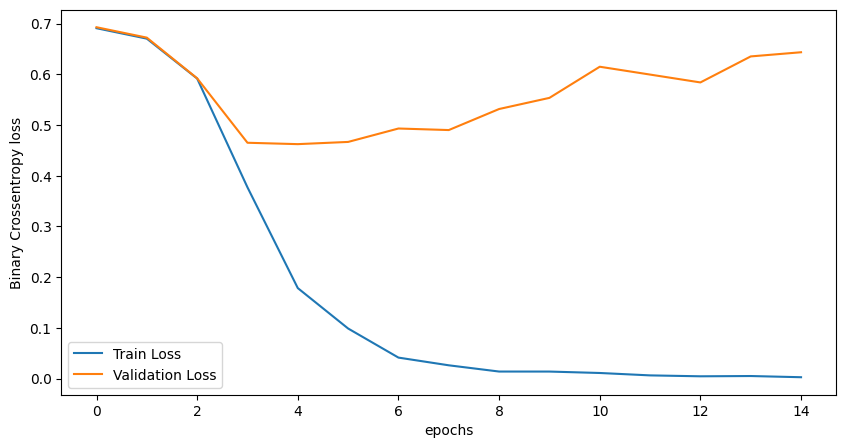

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy loss')
plt.legend()
plt.show()

Evaluate the model

In [36]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9550


[0.12915773689746857, 0.9549999833106995]

In [37]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 4ms/step - loss: 0.5976 - accuracy: 0.7950


[0.5976183414459229, 0.7950000166893005]

Predict results for train and test

In [39]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

7/7 [==============================] - 0s 3ms/step


In [40]:
yprob_train[0:5]

array([[9.9863476e-01],
       [9.9995244e-01],
       [9.9999928e-01],
       [2.1950560e-05],
       [1.8111960e-04]], dtype=float32)

In [41]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

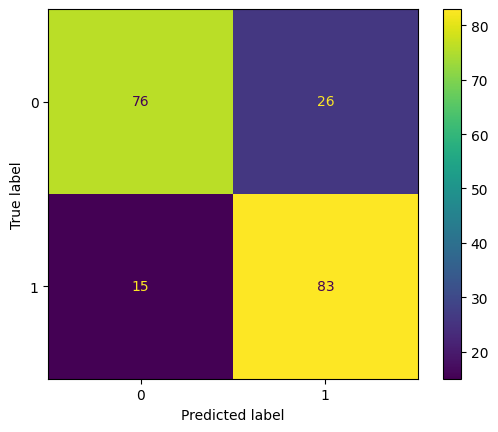

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.76      0.85      0.80        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



Save the model for future use

In [44]:
model.save("SentimentModel.keras")

Load the model

In [45]:
from keras.models import load_model

In [46]:
nn = load_model("/content/SentimentModel.keras")
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524032    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Out of sample prediction**

In [47]:
s = "Very tasty food"
t = tfidf.transform([s]).toarray()
t

array([[0., 0., 0., ..., 0., 0., 0.]])

In [48]:
model.predict(t)

1/1 [==============================] - 0s 30ms/step


array([[0.996669]], dtype=float32)

In [49]:
def predict_sentiment():
  text = input("Please enter restuaraunt review : ")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob>=0.5:
    print("Positive Review")
  else:
    print("Negative Review")
  return prob

In [50]:
predict_sentiment()

Please enter restuaraunt review : Very good ambience , i liked it
1/1 [==============================] - 0s 18ms/step
Positive Review


array([[0.9997794]], dtype=float32)

In [51]:
predict_sentiment()

Please enter restuaraunt review : Bad Taste, I did not like the taste of Pizza here
1/1 [==============================] - 0s 41ms/step
Negative Review


array([[0.00033431]], dtype=float32)